<a href="https://colab.research.google.com/github/TausifShahanshah/Time-Series-Prediction-and-Anomaly-Detection-using-ARIMA/blob/main/Time_series_Predection_%26_Anomaly_Detection_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [ ]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [ ]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [ ]:
df_airline.dropna(axis=0,inplace=True)

In [ ]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [ ]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])


In [ ]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [ ]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
df_airline.set_index('Month',inplace=True)

In [ ]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

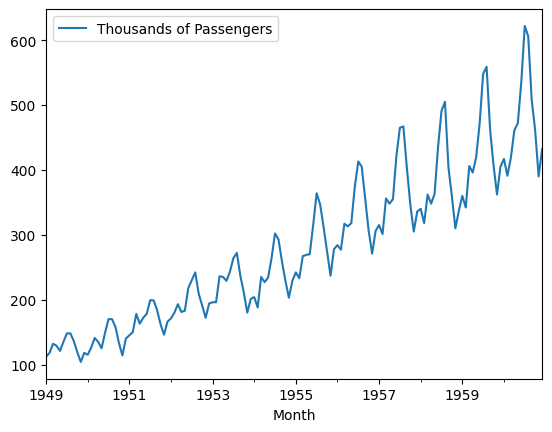

In [ ]:
df_airline.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [ ]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [ ]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [ ]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [ ]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

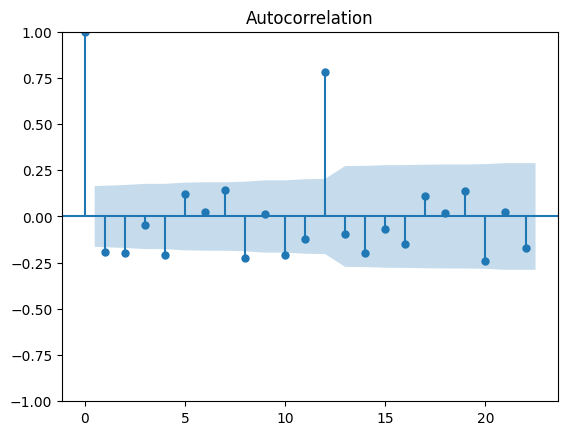

In [ ]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


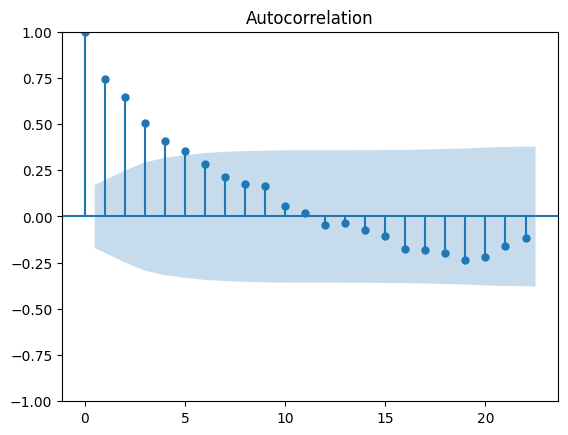

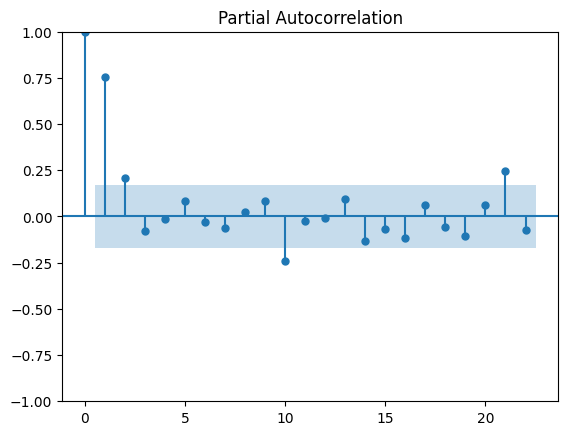

In [ ]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


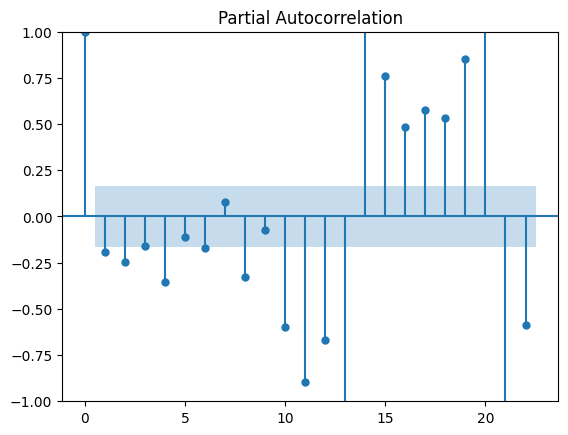

In [ ]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

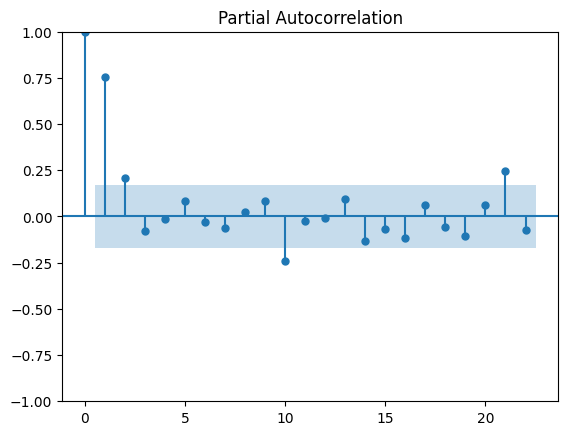

In [ ]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [ ]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [ ]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]


In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [ ]:
import statsmodels.api as sm

In [ ]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [ ]:
mod = sm.tsa.arima.ARIMA(endog=train_data['Thousands of Passengers'],order=(1, 2, 1))
res = mod.fit()
print(res.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(1, 2, 1)   Log Likelihood                -367.837
Date:                     Wed, 09 Aug 2023   AIC                            741.674
Time:                             17:49:51   BIC                            748.894
Sample:                         01-01-1949   HQIC                           744.572
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2214      0.131      1.687      0.092      -0.036       0.479
ma.L1         -0.9996      6.411     -0.156      0.876     -13.565      11.565
sigma2      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-3.403100e+03
1956-02-01,277.0,-7.0,-13.0,44.0,-4.326363e+04
1956-03-01,317.0,40.0,47.0,50.0,-2.693782e+05
1956-04-01,313.0,-4.0,-44.0,44.0,-1.194385e+06
1956-05-01,318.0,5.0,9.0,48.0,-4.264854e+06
1956-06-01,374.0,56.0,51.0,59.0,-1.304913e+07
1956-07-01,413.0,39.0,-17.0,49.0,-3.550372e+07
1956-08-01,405.0,-8.0,-47.0,58.0,-8.801822e+07
1956-09-01,355.0,-50.0,-42.0,43.0,-2.022573e+08


In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)



1956-01-01 00:00:00
1960-12-01 00:00:00


In [ ]:
pred=res.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [ ]:
pred

1956-01-01    288.750772
1956-02-01    292.803079
1956-03-01    295.372061
1956-04-01    297.612571
1956-05-01    299.780344
1956-06-01    301.932010
1956-07-01    304.080109
1956-08-01    306.227418
1956-09-01    308.374552
1956-10-01    310.521647
1956-11-01    312.668734
1956-12-01    314.815819
1957-01-01    316.962904
1957-02-01    319.109988
1957-03-01    321.257073
1957-04-01    323.404157
1957-05-01    325.551241
1957-06-01    327.698326
1957-07-01    329.845410
1957-08-01    331.992495
1957-09-01    334.139579
1957-10-01    336.286664
1957-11-01    338.433748
1957-12-01    340.580832
1958-01-01    342.727917
1958-02-01    344.875001
1958-03-01    347.022086
1958-04-01    349.169170
1958-05-01    351.316255
1958-06-01    353.463339
1958-07-01    355.610423
1958-08-01    357.757508
1958-09-01    359.904592
1958-10-01    362.051677
1958-11-01    364.198761
1958-12-01    366.345845
1959-01-01    368.492930
1959-02-01    370.640014
1959-03-01    372.787099
1959-04-01    374.934183


In [ ]:
residuals

Month
1956-01-01     -4.750772
1956-02-01    -15.803079
1956-03-01     21.627939
1956-04-01     15.387429
1956-05-01     18.219656
1956-06-01     72.067990
1956-07-01    108.919891
1956-08-01     98.772582
1956-09-01     46.625448
1956-10-01     -4.521647
1956-11-01    -41.668734
1956-12-01     -8.815819
1957-01-01     -1.962904
1957-02-01    -18.109988
1957-03-01     34.742927
1957-04-01     24.595843
1957-05-01     29.448759
1957-06-01     94.301674
1957-07-01    135.154590
1957-08-01    135.007505
1957-09-01     69.860421
1957-10-01     10.713336
1957-11-01    -33.433748
1957-12-01     -4.580832
1958-01-01     -2.727917
1958-02-01    -26.875001
1958-03-01     14.977914
1958-04-01     -1.169170
1958-05-01     11.683745
1958-06-01     81.536661
1958-07-01    135.389577
1958-08-01    147.242492
1958-09-01     44.095408
1958-10-01     -3.051677
1958-11-01    -54.198761
1958-12-01    -29.345845
1959-01-01     -8.492930
1959-02-01    -28.640014
1959-03-01     33.212901
1959-04-01     21.0

<Axes: ylabel='Density'>

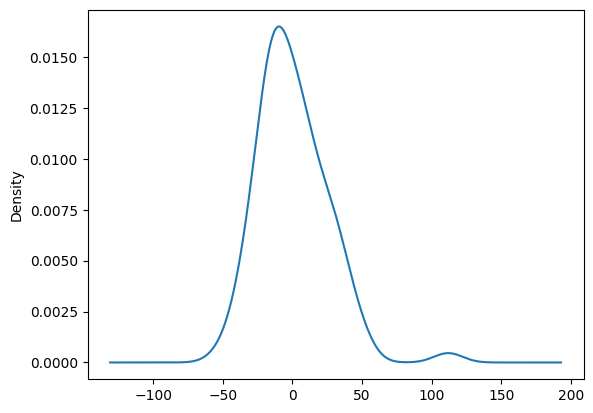

In [ ]:
res.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

<ipython-input-107-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

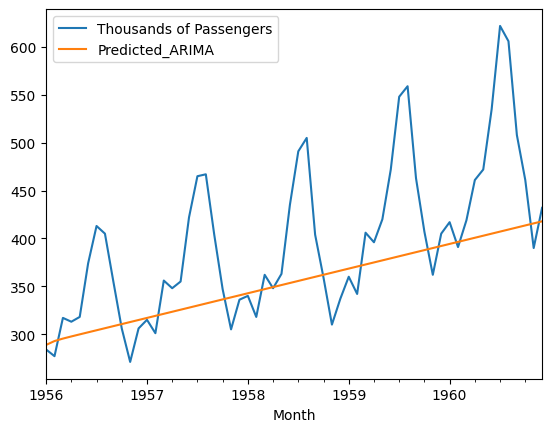

In [ ]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


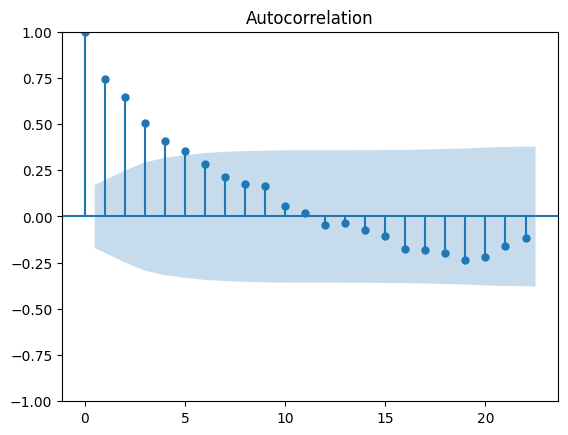

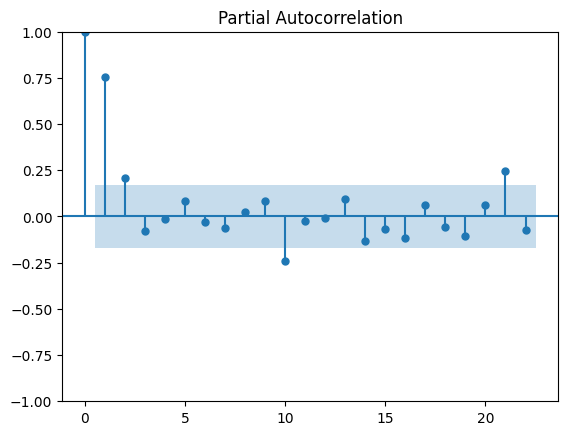

In [ ]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [ ]:
#Detecting Anamolies
def find_anomalies(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold

In [ ]:
squared_errors = res.resid ** 2
predictions, threshold = find_anomalies(squared_errors)


In [ ]:
print(threshold)

2047.949527078663


In [ ]:
test_data['anomaly_predictions'] = predictions

<ipython-input-115-795751ee28f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['anomaly_predictions'] = predictions


In [ ]:
print(test_data['anomaly_predictions'])

Month
1956-01-01   NaN
1956-02-01   NaN
1956-03-01   NaN
1956-04-01   NaN
1956-05-01   NaN
1956-06-01   NaN
1956-07-01   NaN
1956-08-01   NaN
1956-09-01   NaN
1956-10-01   NaN
1956-11-01   NaN
1956-12-01   NaN
1957-01-01   NaN
1957-02-01   NaN
1957-03-01   NaN
1957-04-01   NaN
1957-05-01   NaN
1957-06-01   NaN
1957-07-01   NaN
1957-08-01   NaN
1957-09-01   NaN
1957-10-01   NaN
1957-11-01   NaN
1957-12-01   NaN
1958-01-01   NaN
1958-02-01   NaN
1958-03-01   NaN
1958-04-01   NaN
1958-05-01   NaN
1958-06-01   NaN
1958-07-01   NaN
1958-08-01   NaN
1958-09-01   NaN
1958-10-01   NaN
1958-11-01   NaN
1958-12-01   NaN
1959-01-01   NaN
1959-02-01   NaN
1959-03-01   NaN
1959-04-01   NaN
1959-05-01   NaN
1959-06-01   NaN
1959-07-01   NaN
1959-08-01   NaN
1959-09-01   NaN
1959-10-01   NaN
1959-11-01   NaN
1959-12-01   NaN
1960-01-01   NaN
1960-02-01   NaN
1960-03-01   NaN
1960-04-01   NaN
1960-05-01   NaN
1960-06-01   NaN
1960-07-01   NaN
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-